In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
%matplotlib inline
%config InlineBackend.figure_formats = ["retina"]
import seaborn as sns
import time

import matplotlib.ticker as ticker
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from plotnine import *
from plotnine.data import *

In [2]:
# Load packages and functions for Machine Learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

!pip uninstall -y plot-metric scikit-plot scipy
!pip install scipy==1.7.3
!pip install plot-metric scikit-plot
!sed -i 's/from scipy import interp/from numpy import interp/' /usr/local/lib/python3.11/dist-packages/scikitplot/metrics.py
!sed -i 's/from scipy import interp/from numpy import interp/' /usr/local/lib/python3.11/dist-packages/plot_metric/functions.py


Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy==1.7.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1

In [4]:


# classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [5]:
# dataset import
df = pd.read_csv("https://raw.githubusercontent.com/JackGO-1998/ShowCase/refs/heads/main/Notebook/WA_Fn-UseC_-Telco-Customer-Churn.csv")
orig_df = df

In [6]:
# Initial dataframe exploration
df.shape
df.info()
pd.set_option('display.max_columns', None)
df.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
# set up a function to analyze the dataframe and create a simple data dictionary.
def analyze_dataframe(data):
    # Create the analysis dataframe
    analysis_df = pd.DataFrame({
        'column_name': df.columns,
        'comp_records': df.notnull().sum().values,
        'missing_records': df.isnull().sum().values,
        'pct_comp': df.notnull().mean().values * 100,
        'data_type': df.dtypes.values
    })
    return analysis_df

In [9]:
# Build a simple data dictionary for the dataframe
analyze_dataframe(df)

,column_name,comp_records,missing_records,pct_comp,data_type
0,customerID,7043,0,100.0,object
1,gender,7043,0,100.0,object
2,SeniorCitizen,7043,0,100.0,int64
3,Partner,7043,0,100.0,object
4,Dependents,7043,0,100.0,object
5,tenure,7043,0,100.0,int64
6,PhoneService,7043,0,100.0,object
7,MultipleLines,7043,0,100.0,object
8,InternetService,7043,0,100.0,object
9,OnlineSecurity,7043,0,100.0,object


In [10]:
# Explore the numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# found values with ' ' in the TotalCharges field and replace them
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# create a backup copy of the modified dataset
backup_df = df.copy()

In [13]:
# Examine the target variable
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
# The target variable Churn is listed as Yes/No. Convert it to 1/0.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [15]:
# what percentage of the customers churned in the last month?
df['Churn'].mean().__round__(2)*100

np.float64(27.0)

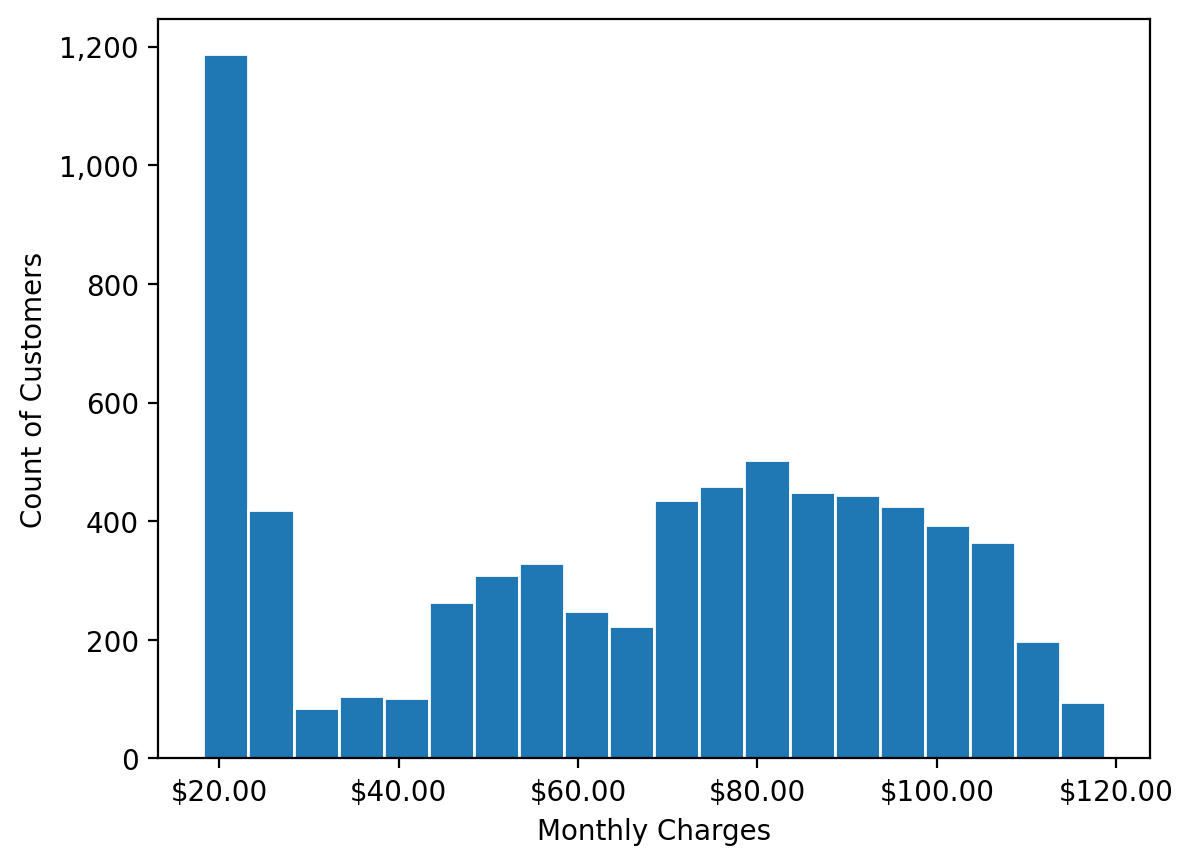

In [16]:
# Data exploration with Visualization
# plot a histogram of Monthly Charges
plt.hist(df['MonthlyCharges'], bins=20, edgecolor='white')
# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.2f}'.format(x)))
plt.xlabel('Monthly Charges')
plt.ylabel('Count of Customers')

plt.show()

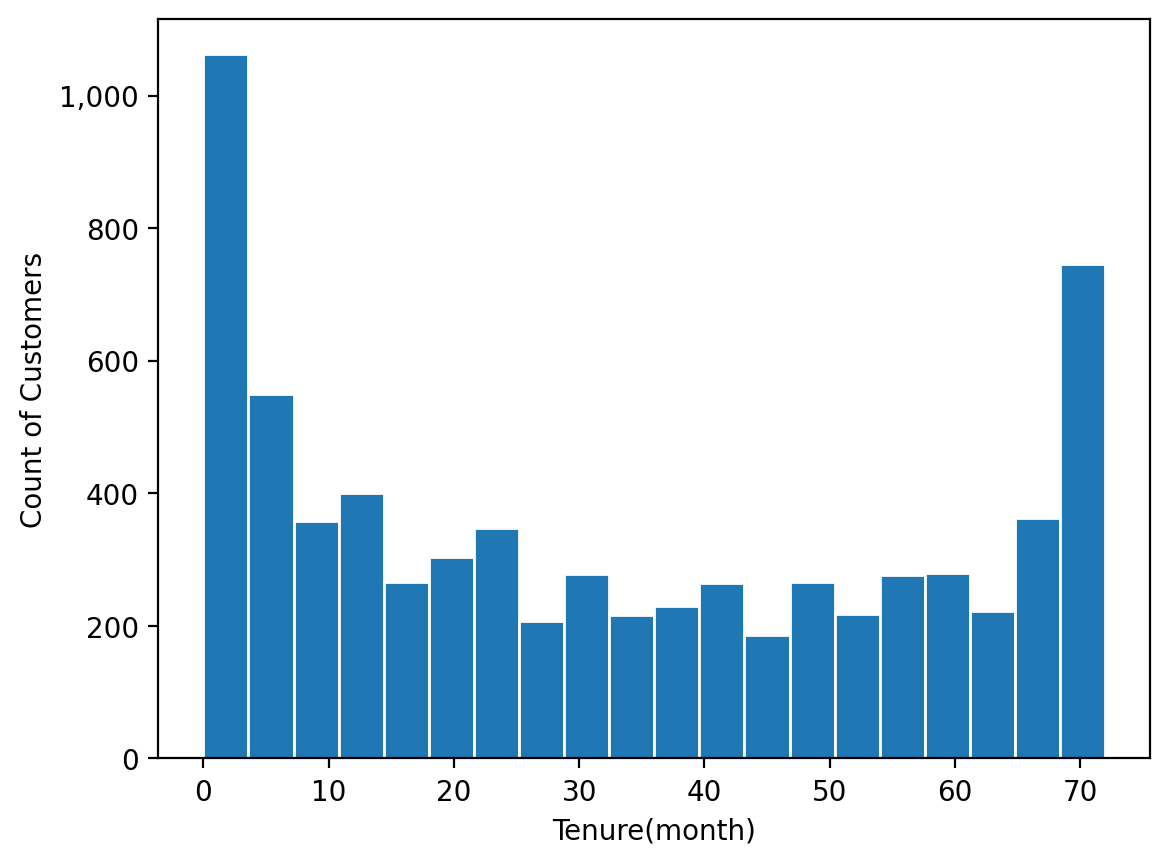

In [17]:
# plot a histogram chart of tenure
plt.hist(df['tenure'], bins=20, edgecolor='white')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel('Tenure(month)')
plt.ylabel('Count of Customers')

plt.show()

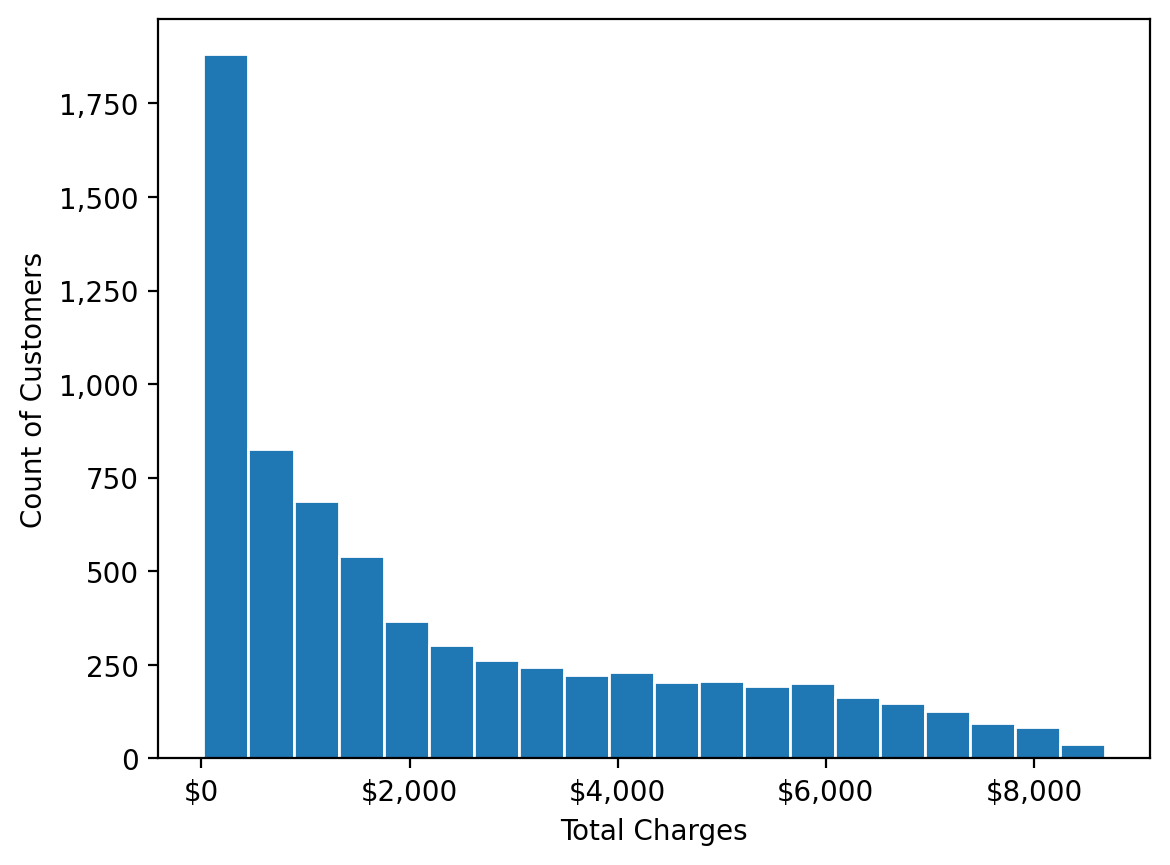

In [18]:
# plot a histogram chart of total charges
plt.hist(df['TotalCharges'], bins=20, edgecolor='white')
# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.xlabel('Total Charges')
plt.ylabel('Count of Customers')

plt.show()

In [19]:
# for visualization purposes, create a version of the churn variable that is Yes/No
df['Leave'] = df['Churn'].map({1: 'Yes', 0: 'No'})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Leave
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,Yes


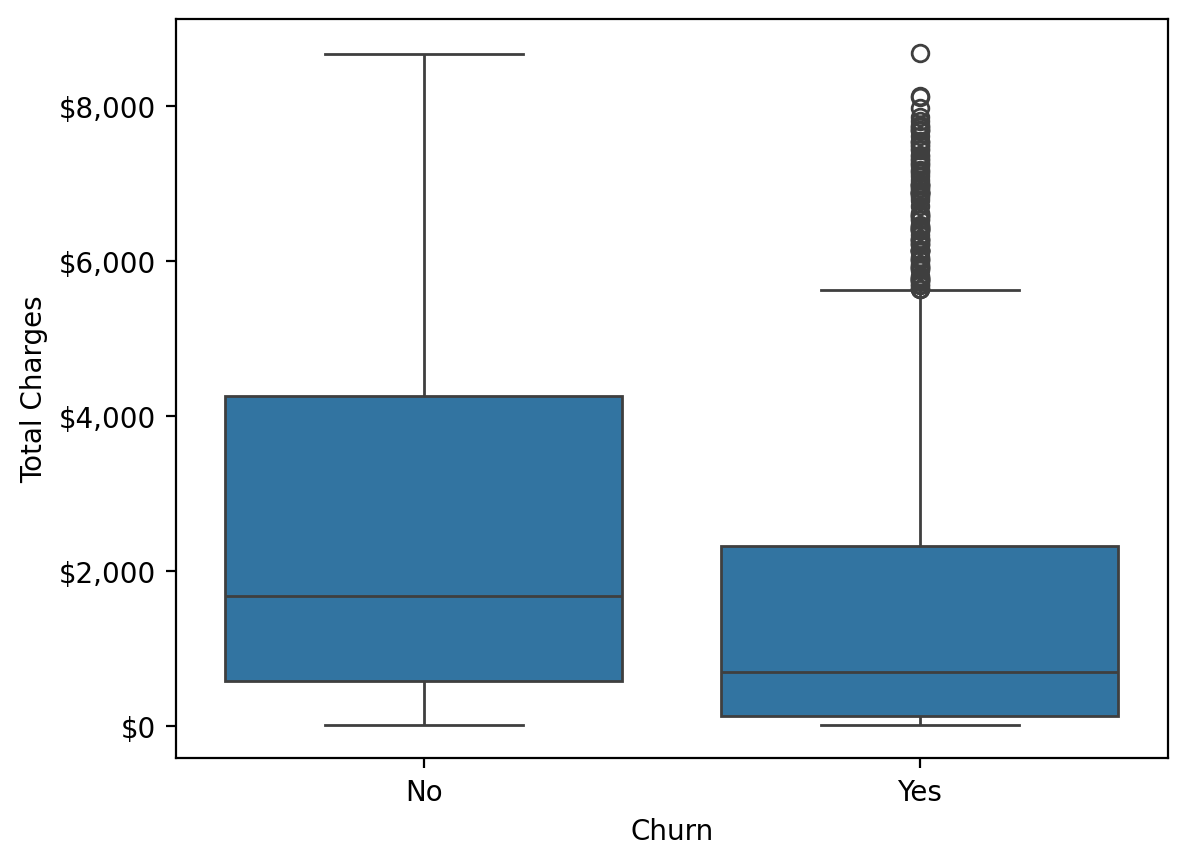

In [20]:
ax = sns.boxplot(x='Leave', y='TotalCharges', data=df)
ax.set_xlabel('Churn')
ax.set_ylabel('Total Charges')
# Format y-axis with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))


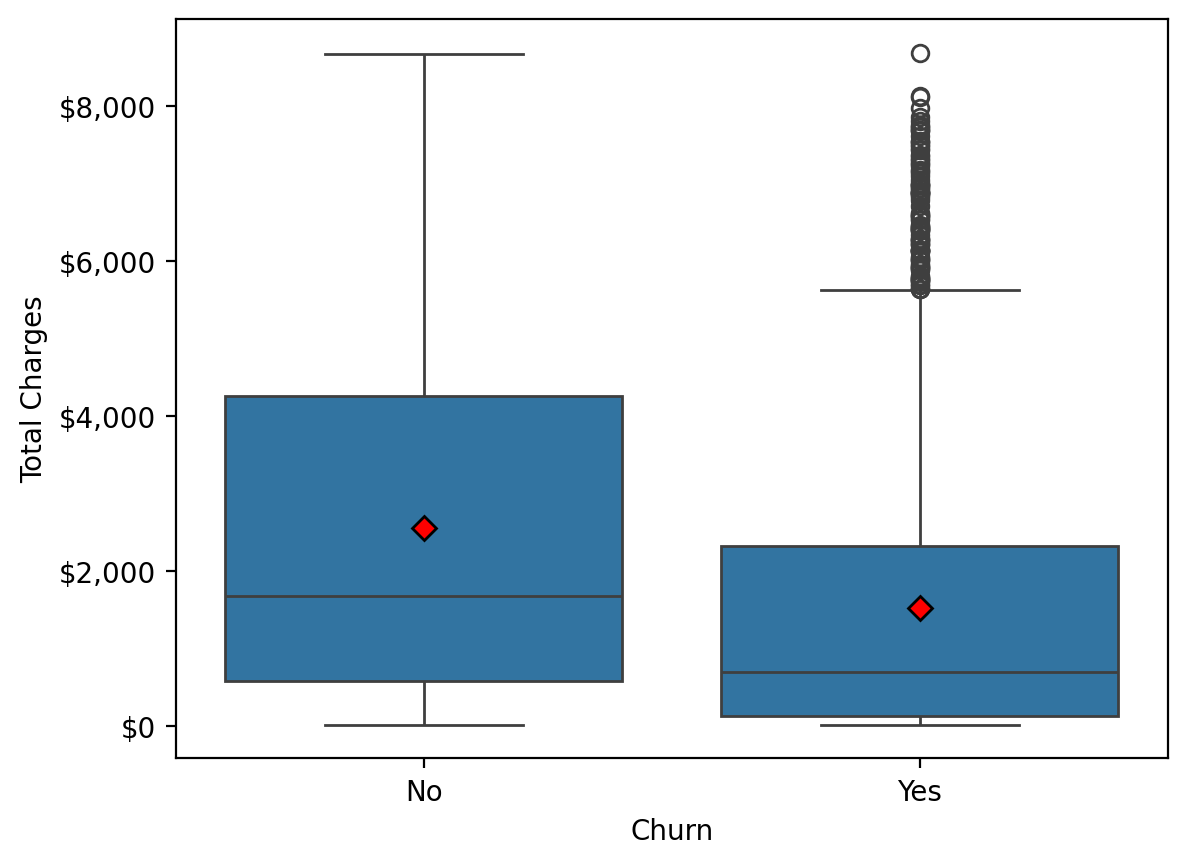

In [21]:
# compare the numeric variables by the target variable Leave
# add the mean as a diamond to each box in the boxplot
# Define mean properties
mean = {
    "marker": "D",
    "markerfacecolor": "RED",
    "markeredgecolor": "black",
    "markersize": 6
}
ax = sns.boxplot(x='Leave', y='TotalCharges', data=df, showmeans=True, meanprops=mean)
ax.set_xlabel('Churn')
ax.set_ylabel('Total Charges')
# Format y-axis with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.show()


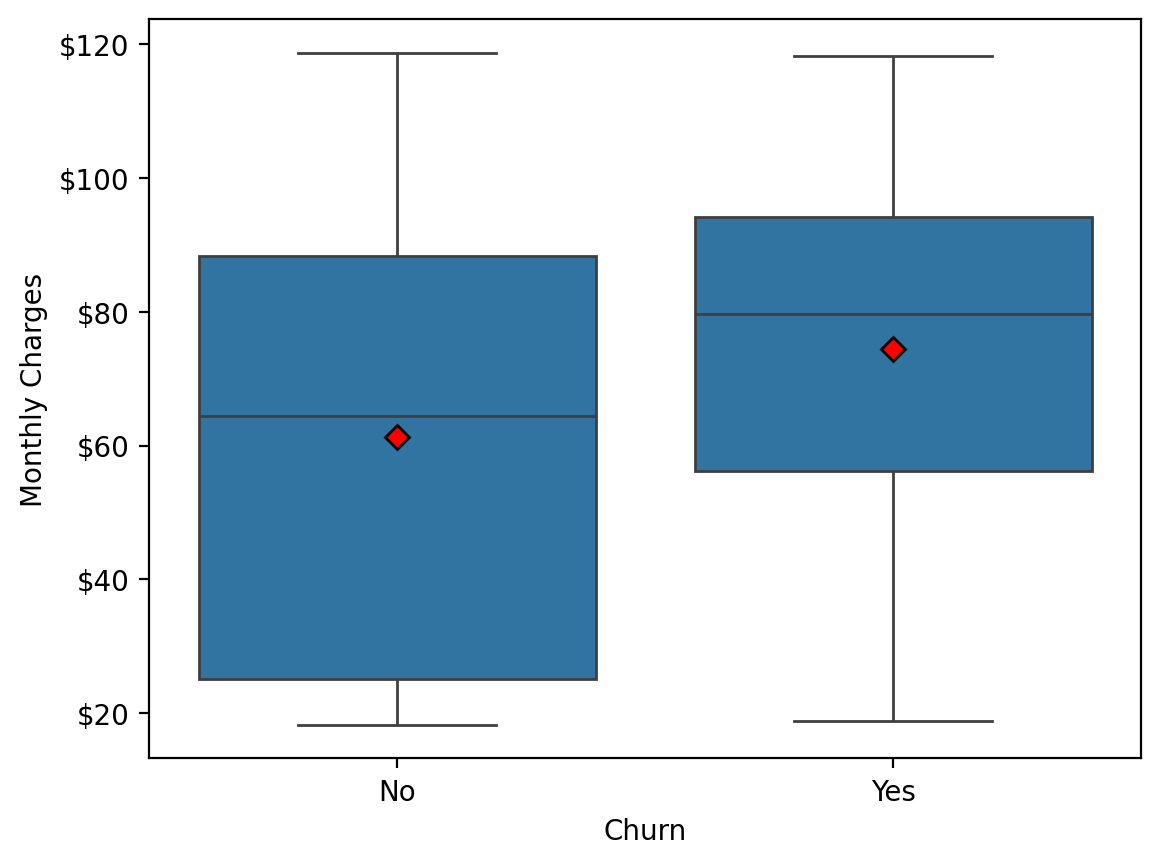

In [22]:
# Now compare the monthly charge with the target variable Leave
meanprops = {
    "marker": "D",
    "markerfacecolor": "red",
    "markeredgecolor": "black",
    "markersize": 6
}
ax = sns.boxplot(x='Leave', y='MonthlyCharges', data=df, showmeans=True, meanprops=meanprops)
ax.set_xlabel('Churn')
ax.set_ylabel('Monthly Charges')
# Format y-axis with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.show()


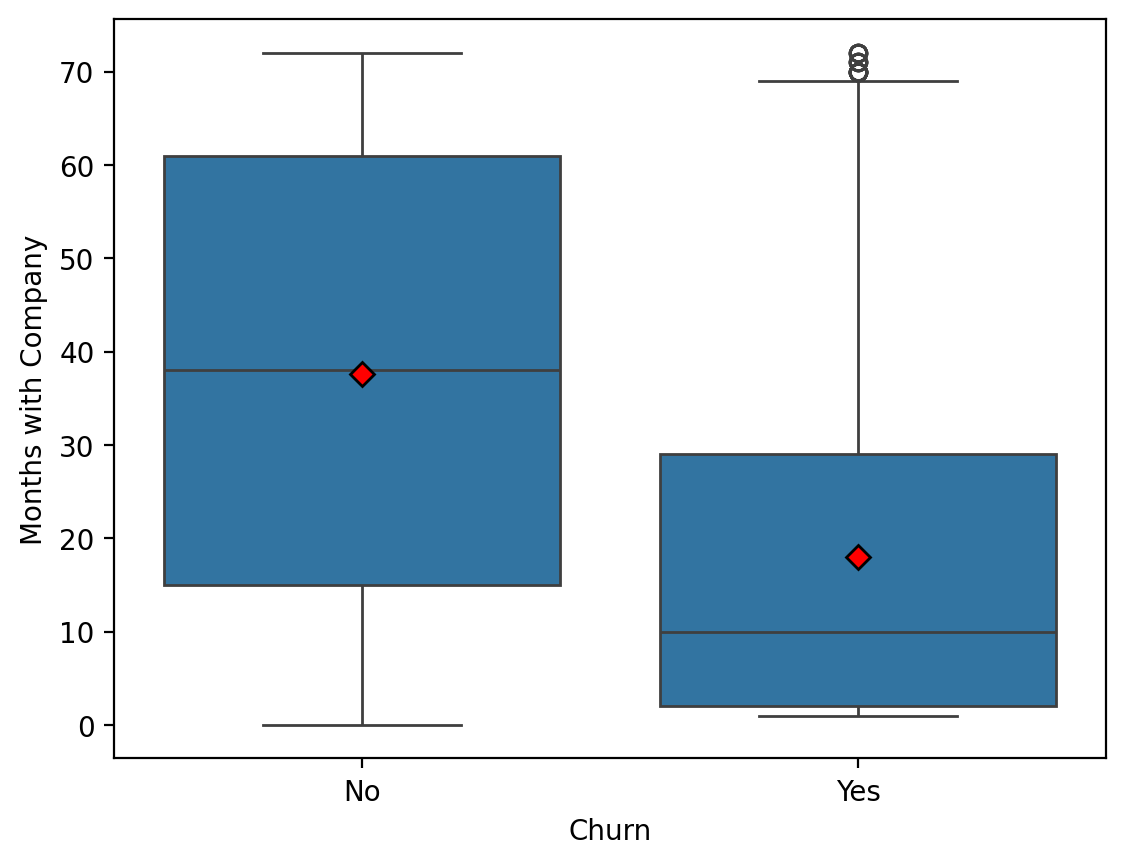

In [23]:
# Now compare the tenure with the target variable Leave
meanprops = {
    "marker": "D",
    "markerfacecolor": "red",
    "markeredgecolor": "black",
    "markersize": 6
}
ax = sns.boxplot(x='Leave', y='tenure', data=df, showmeans=True, meanprops=meanprops)
ax.set_xlabel('Churn')
ax.set_ylabel('Months with Company')
# Format y-axis with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

Explore some of the categorical variables

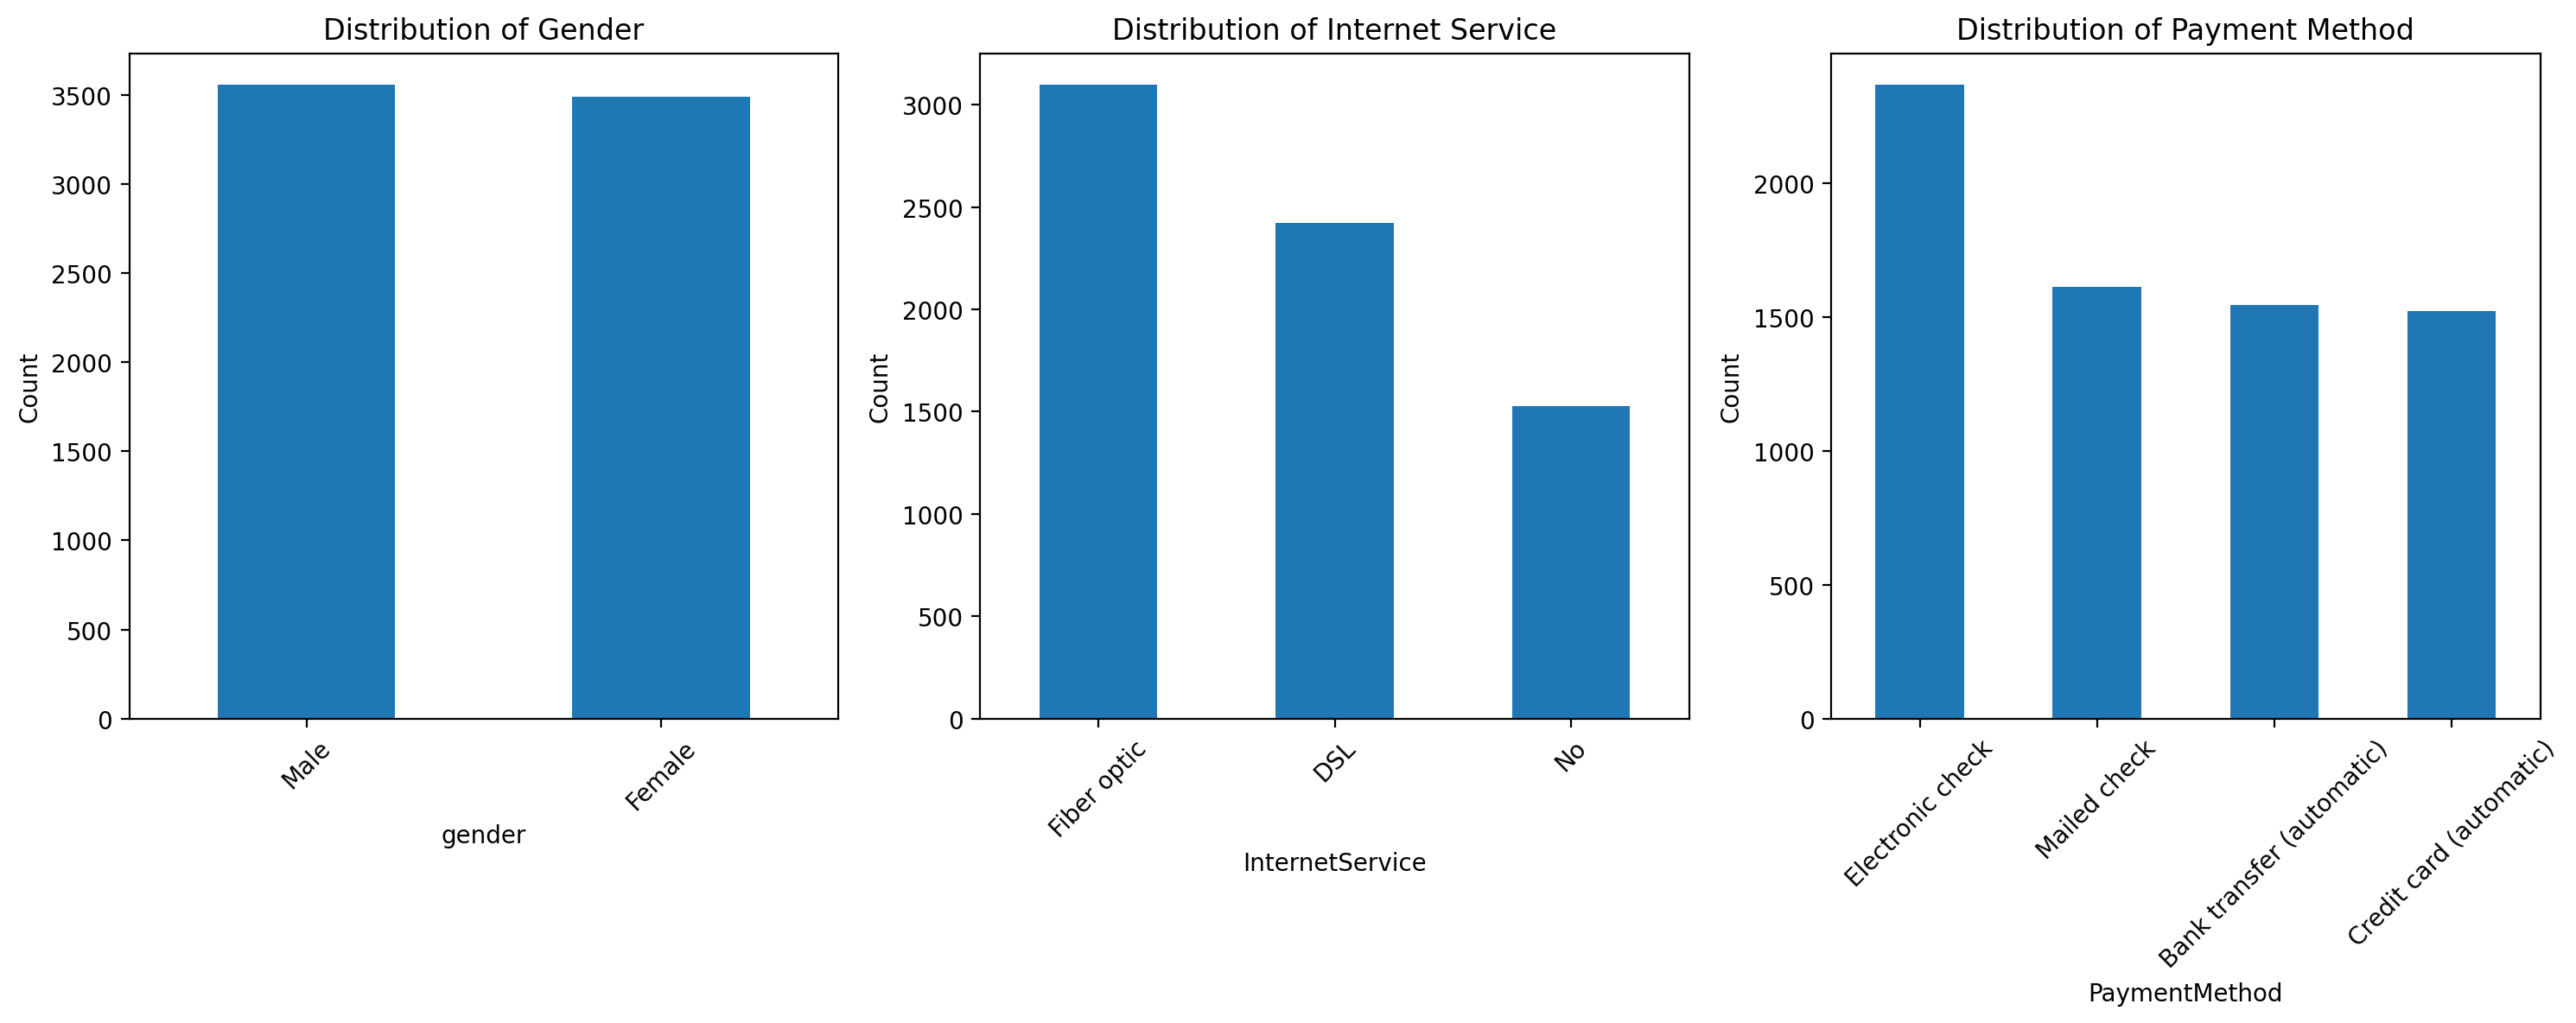

In [25]:
#grid creating wholely
cols = ['gender', 'InternetService', 'PaymentMethod']
titles = ["Distribution of Gender", "Distribution of Internet Service", "Distribution of Payment Method"]

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each column and plot the bar chart
for ax, col, title in zip(axes, cols, titles):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)


In [26]:
# restore the state of the data frame before analysis
dropCols = ['customerID', 'Leave']
model_df = df.drop(dropCols, axis = 1)
model_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [27]:
for col in list(model_df.columns):
    print(col, model_df[col].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6530
Churn 2


In [28]:
# this next set of code sets up some important features of the dataset
# it also includes code that identifies features by type (categorical or numerical)
SEED = 365
TARGET = 'Churn'
FEATURES = model_df.columns.drop(TARGET)

NUMERICAL = model_df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: SeniorCitizen, tenure, MonthlyCharges, TotalCharges
Categorical features: Contract, Dependents, DeviceProtection, InternetService, MultipleLines, OnlineBackup, OnlineSecurity, PaperlessBilling, Partner, PaymentMethod, PhoneService, StreamingMovies, StreamingTV, TechSupport, gender


In [49]:
# this section of code will set up the data for prediction correctly
# it will first separate the data into train / test
# then it will use the train data to transform categorical data and fill in missing data
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns=TARGET), model_df[TARGET],
                                                    test_size=.3, random_state=365,
                                                    stratify=model_df[TARGET])
num_imputer = SimpleImputer(strategy='mean')
train_num_imputed = num_imputer.fit_transform(X_train[NUMERICAL])

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num_imputed)

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_cat_imputed = cat_imputer.fit_transform(X_train[CATEGORICAL])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
train_cat_encoded = encoder.fit_transform(train_cat_imputed)

train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)

columns = np.append(NUMERICAL, encoder.get_feature_names_out(CATEGORICAL))
pd.DataFrame(train_preprocessed, columns=columns, index=X_train.index).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male
3536,0.0,0.013889,0.606574,0.006970,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,0.0,0.500000,0.578685,0.299090,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1468,0.0,0.861111,0.737550,0.660321,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4567,0.0,0.472222,0.867530,0.407086,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3917,1.0,0.013889,0.506474,0.005808,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# Set up a logistic regression model type to train
# Logistic regression is frequently used for categorical modeling. It can serve as a baseline model to
# compare other non-transparent classification models against.
model = LogisticRegression()
model.fit(train_preprocessed, y_train)

LogisticRegression()

In [33]:
# This section sets up a metric (AUC) function  to use to assess the model and to compare between models.
def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score.

    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)

In [51]:
# The test data needs to be preprocessed the same way
# then caluclate area under the curve for both the training and test data
test_num_imputed = num_imputer.transform(X_test[NUMERICAL])
test_num_scaled = scaler.transform(test_num_imputed)
test_cat_imputed = cat_imputer.transform(X_test[CATEGORICAL])
test_cat_encoded = encoder.transform(test_cat_imputed)
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)

In [31]:
# this code uses the same data, but...
# it sets up a pipeline approach that is repeatable
# imputer is used to substitute the mean for missing numeric values
# then it scales using the MinMaxScaler method
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [34]:
# Now we can use the pipeline to predict and assess the model using the original data
# The results are the same as the longer approach to preprocessing and training above.
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, X_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, X_test, y_test):.4f}")

Train ROC-AUC: 0.8449
Test ROC-AUC: 0.8506


In [52]:
# Let's save the probabilities for the test data in a dataframe.
# We can use this to build a ROC curve and compare across models.
test_LG1 = pd.DataFrame(test_preprocessed, columns=columns, index=X_test.index)
test_LG1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male
1829,0.0,0.111111,0.563745,0.063991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6766,0.0,0.194444,0.014940,0.033579,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1009,1.0,0.319444,0.024900,0.053906,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3283,0.0,0.958333,0.020916,0.164577,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
155,0.0,0.194444,0.624004,0.131074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Now analyze the model predictions
# https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/
# examine the probabilities resulting from the model
probs = pipe.predict_proba(X_test)
probs = probs[:, 1]
probs

array([0.68979726, 0.06050264, 0.1029944 , ..., 0.0254328 , 0.11035702,
       0.04489069])

In [55]:
# add the probabilities array to the test_LG1 data frame
test_LG1['probsLG1'] = probs
test_LG1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male,probsLG1
1829,0.0,0.111111,0.563745,0.063991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.689797
6766,0.0,0.194444,0.014940,0.033579,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.060503
1009,1.0,0.319444,0.024900,0.053906,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.102994
3283,0.0,0.958333,0.020916,0.164577,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.009852
155,0.0,0.194444,0.624004,0.131074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.545525


In [56]:
# add the actual target variable to the test_LG1 data frame
test_LG1['Outcomes'] = y_test
test_LG1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male,probsLG1,Outcomes
1829,0.0,0.111111,0.563745,0.063991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.689797,0
6766,0.0,0.194444,0.014940,0.033579,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.060503,0
1009,1.0,0.319444,0.024900,0.053906,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.102994,0
3283,0.0,0.958333,0.020916,0.164577,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.009852,0
155,0.0,0.194444,0.624004,0.131074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.545525,0


In [57]:
# extract the predictions from the model
predictions = pipe.predict(X_test)
predictions
# add the predictions to the test_LG1 data frame
test_LG1['LG1Prediction'] = predictions
test_LG1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male,probsLG1,Outcomes,LG1Prediction
1829,0.0,0.111111,0.563745,0.063991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.689797,0,1
6766,0.0,0.194444,0.014940,0.033579,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.060503,0,0
1009,1.0,0.319444,0.024900,0.053906,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.102994,0,0
3283,0.0,0.958333,0.020916,0.164577,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.009852,0,0
155,0.0,0.194444,0.624004,0.131074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.545525,0,1


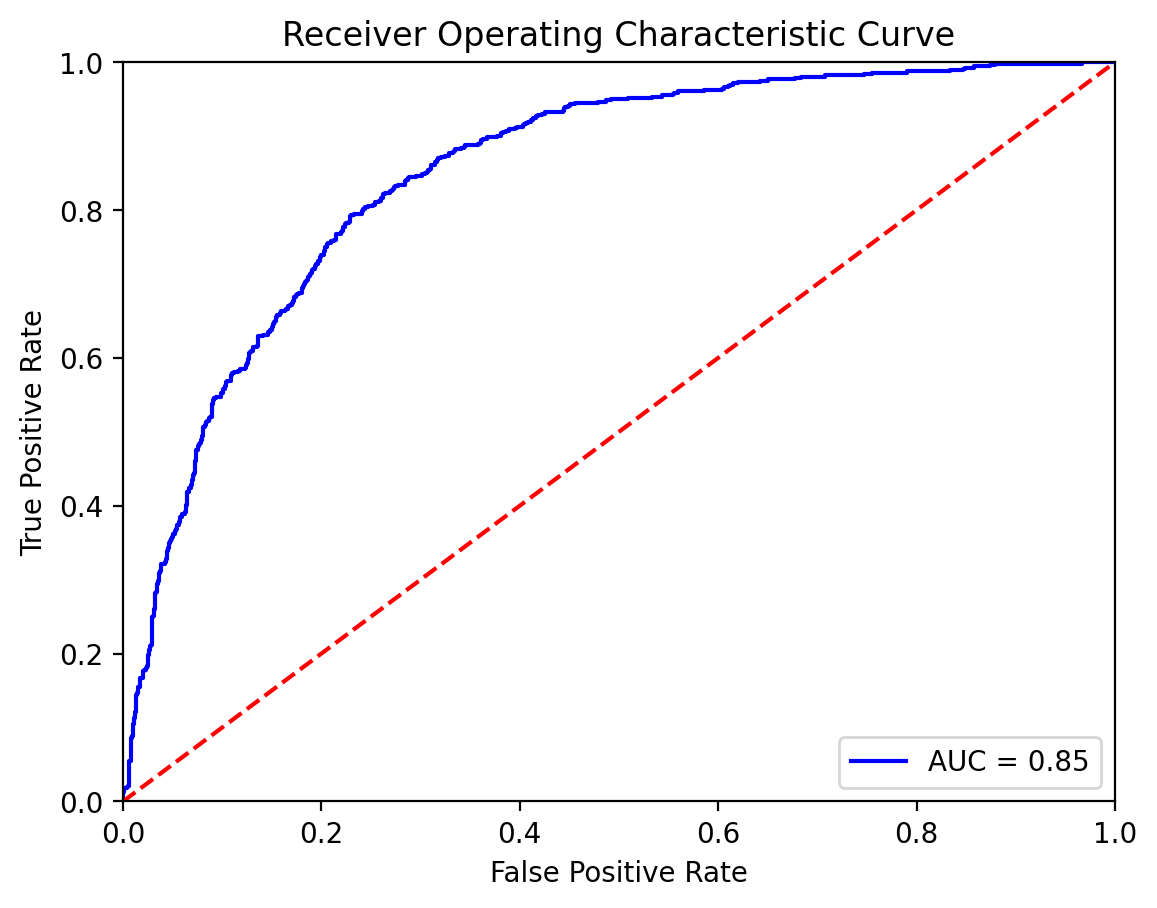

In [42]:
probs = pipe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
# This gives you more information about the effectiveness of the model on the training data
Outcomes = test_LG1['Outcomes']
Predictions = test_LG1['LG1Prediction']

print(classification_report(Outcomes, Predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



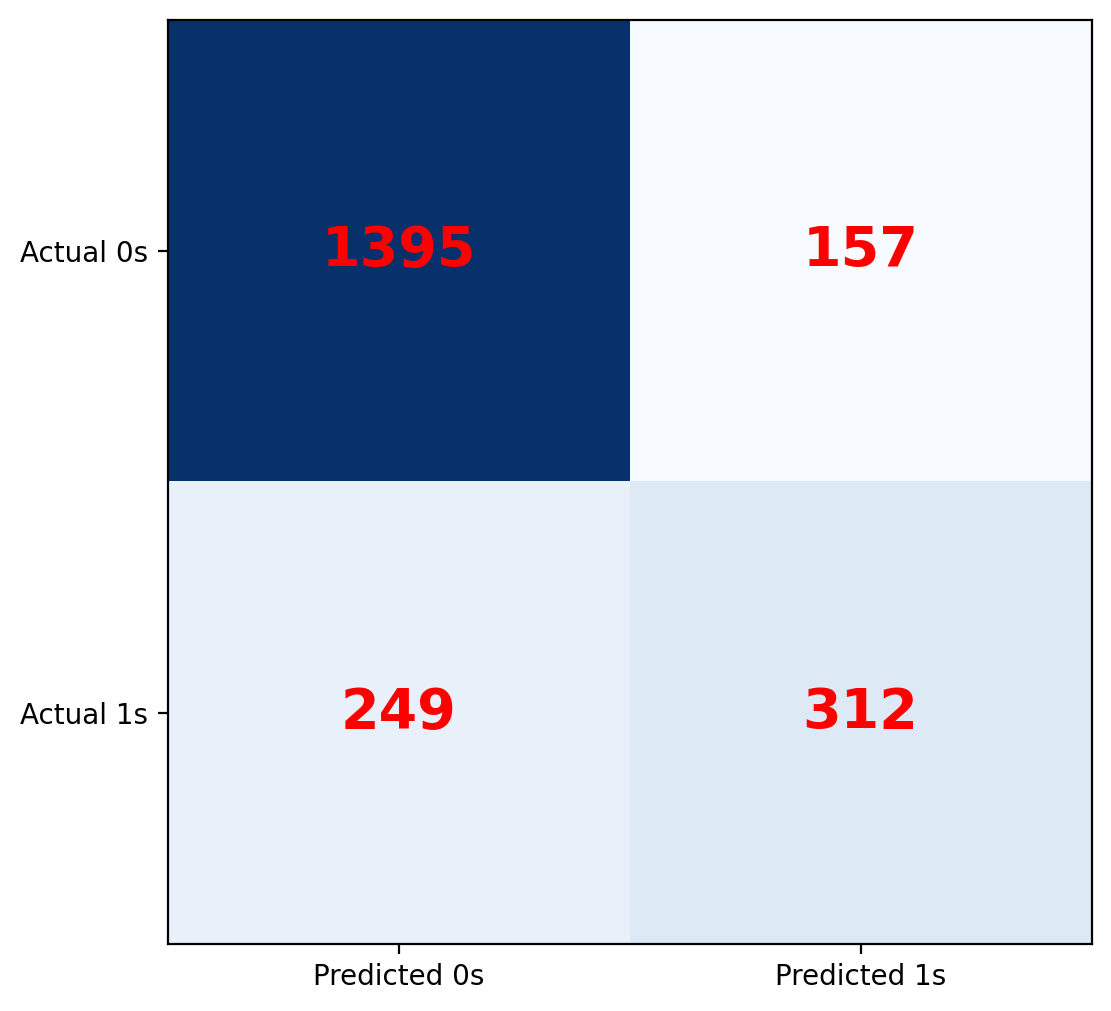

In [44]:
# create a confusion matrix in matplotlib that is easy to read
cm = confusion_matrix(y_test, pipe.predict(X_test))
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', weight='bold', fontsize=20)
plt.show()

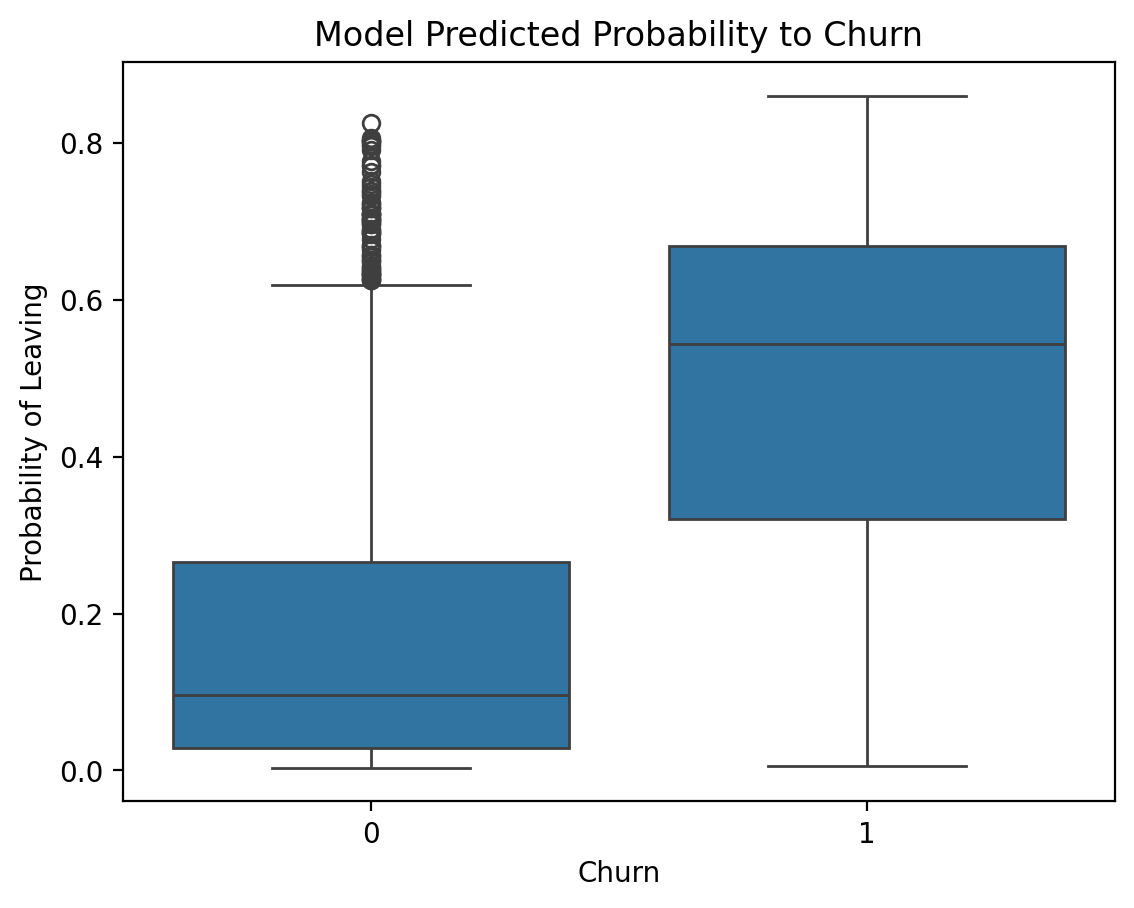

In [59]:
# Churn comparison
sns.boxplot (y=test_LG1['probsLG1'], x=test_LG1['Outcomes'] );
plt.xlabel("Churn")
plt.ylabel("Probability of Leaving")
plt.title("Model Predicted Probability to Churn")
plt.show()

In [46]:
# other key metrics
# https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
predictions_test = pipe.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
predictions_train = pipe.predict(X_train)
accuracy_train = accuracy_score(y_train, predictions_train)
print("Train accuracy is = ", accuracy_train)
print("Test accuracy is = ", accuracy_test)

Train accuracy is =  0.8004056795131845
Test accuracy is =  0.8078561287269286


In [60]:
# save the model results to Excel
test_LG1.to_excel('test_LG1.xlsx', index=False)

In [63]:
lr_pipeline = Pipeline([
    ('lr', LogisticRegression())
])
grid_params = {
  'lr__penalty': ['l1', 'l2'],
  'lr__C': [1, 5, 10],
  'lr__max_iter': [20, 50, 100, 10000],
}
clf = GridSearchCV(lr_pipeline, grid_params)
clf.fit(train_preprocessed, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.11/dist-packages/sklearn/line

Best Score:  0.8030425963488843
Best Params:  {'lr__C': 10, 'lr__max_iter': 20, 'lr__penalty': 'l2'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

In [65]:
# set up a multiple model pipelines

from sklearn.preprocessing import StandardScaler
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=365))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=365))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=365))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=365, probability=True))])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=365))])

In [66]:
# set up the hyperparameters for the models
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'],
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

In [67]:
# set up the grid search for each of the models
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=3)

In [68]:
X_train = train_preprocessed
X_test = test_preprocessed
# run the pipelines
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f8ff4881620>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libscipy_openblas-c128ec02.

In [69]:
# assess the different model types using accuracy and provide the hyperparameters used
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.8078561287269286
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.79649787032655
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.79649787032655
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 6}
K-Nearest Neighbors Test Accuracy: 0.7685754850922859
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
Support Vector Machines Test Accuracy: 0.804070042593469
Support Vector Machines Best Params: {'SVM__C': 2, 'SVM__kernel': 'linear'}
XGBoost Test Accuracy: 0.8054898248935163
XGBoost Best Params: {'XGB__learning_rate': 0.2, 'XGB__max_depth': 1, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 0.5}


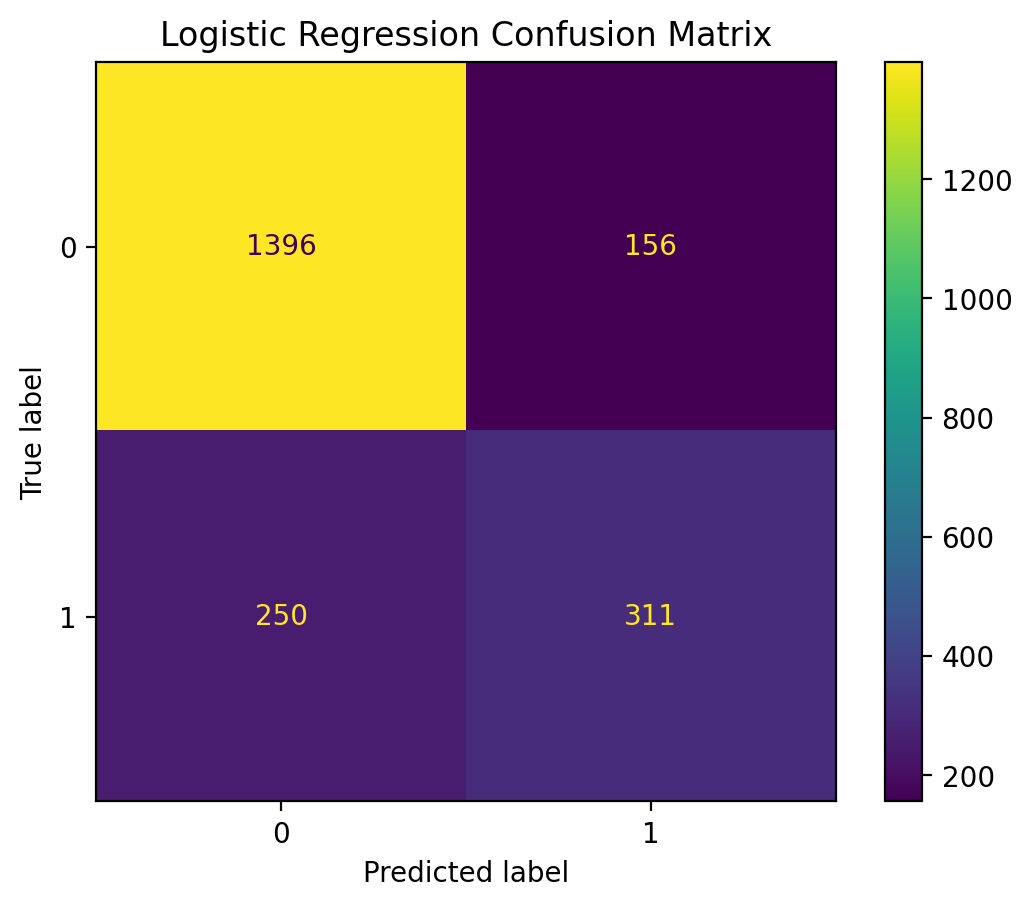

In [70]:
# show the confusion matrix plot for logistic regression
y_pred = lr_grid_search.predict(X_test)
cm = confusion_matrix(y_test, lr_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("Logistic Regression Confusion Matrix")
plt.show()


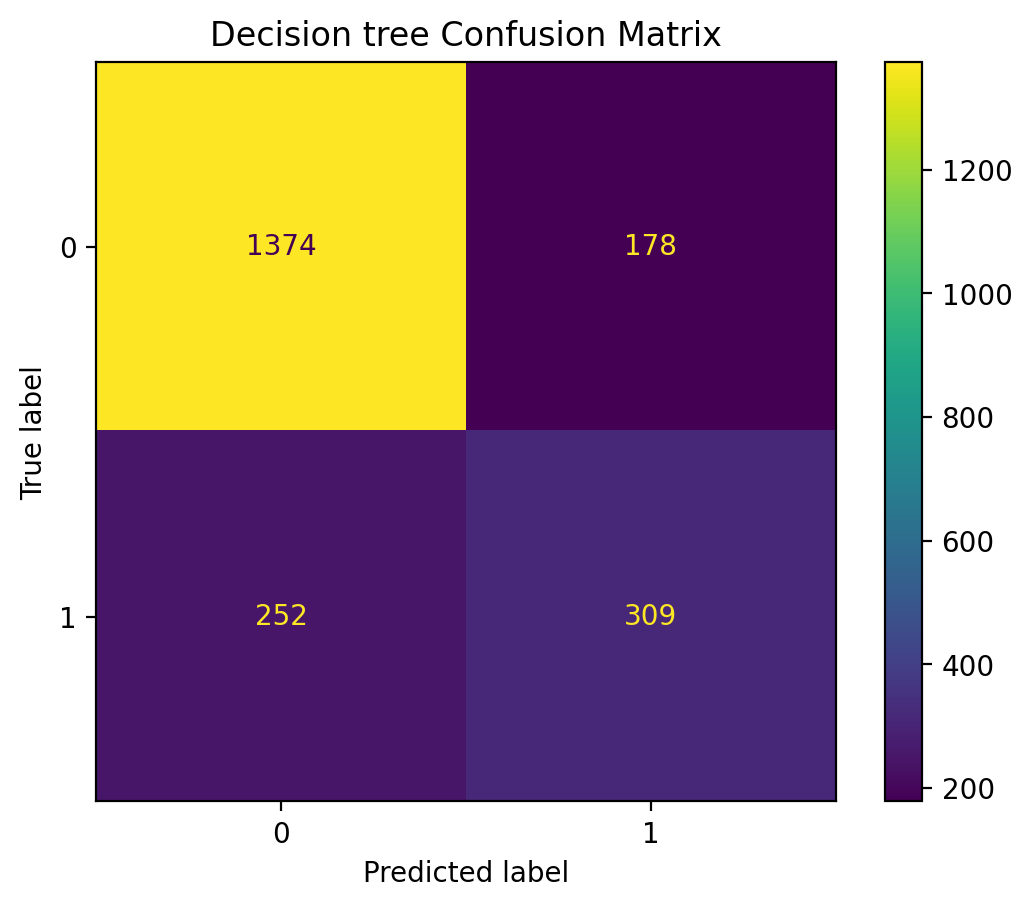

In [71]:
# show the confusion matrix plot for the decision tree
y_pred = dt_grid_search.predict(X_test)
cm = confusion_matrix(y_test, dt_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("Decision tree Confusion Matrix")
plt.show()

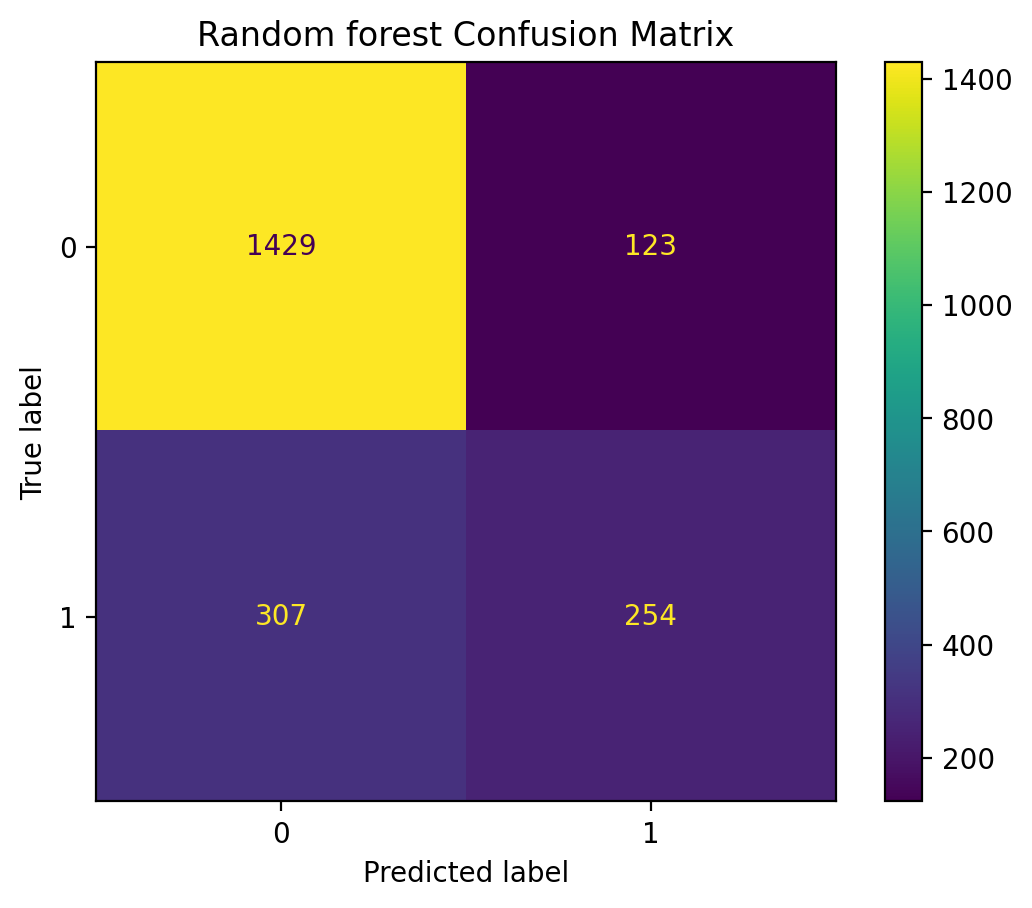

In [72]:
# show the confusion matrix plot for the Random Forest
y_pred = rf_grid_search.predict(X_test)
cm = confusion_matrix(y_test, rf_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("Random forest Confusion Matrix")
plt.show()

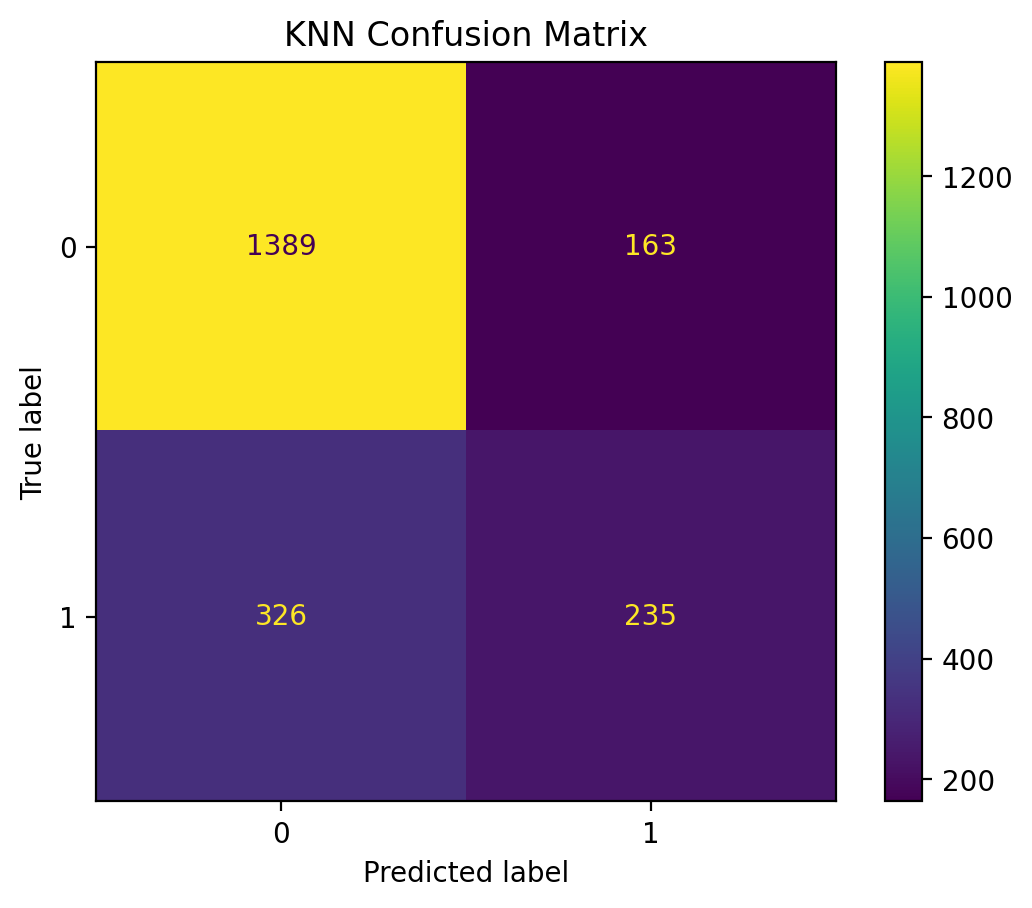

In [73]:
# show the confusion matrix plot for the KNN model
y_pred = knn_grid_search.predict(X_test)
cm = confusion_matrix(y_test, knn_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("KNN Confusion Matrix")
plt.show()

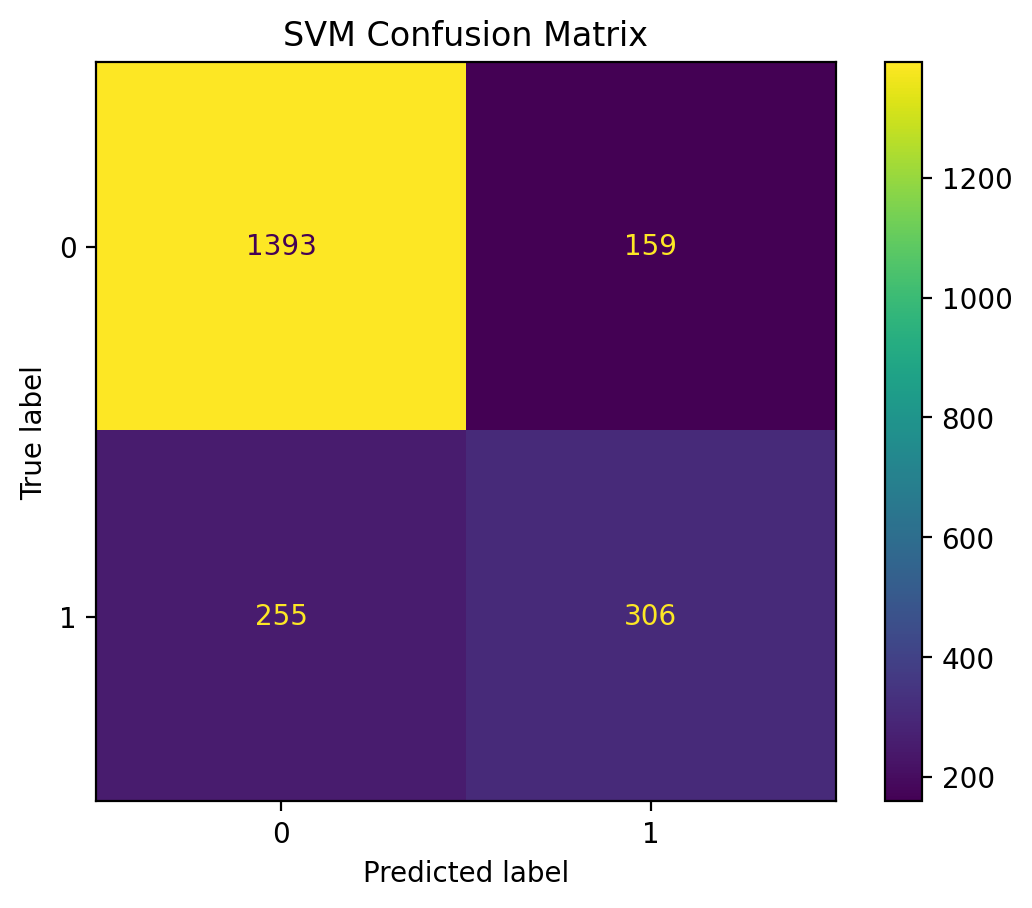

In [74]:
# show the confusion matrix plot for the SVM model
y_pred = svm_grid_search.predict(X_test)
cm = confusion_matrix(y_test, svm_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("SVM Confusion Matrix")
plt.show()

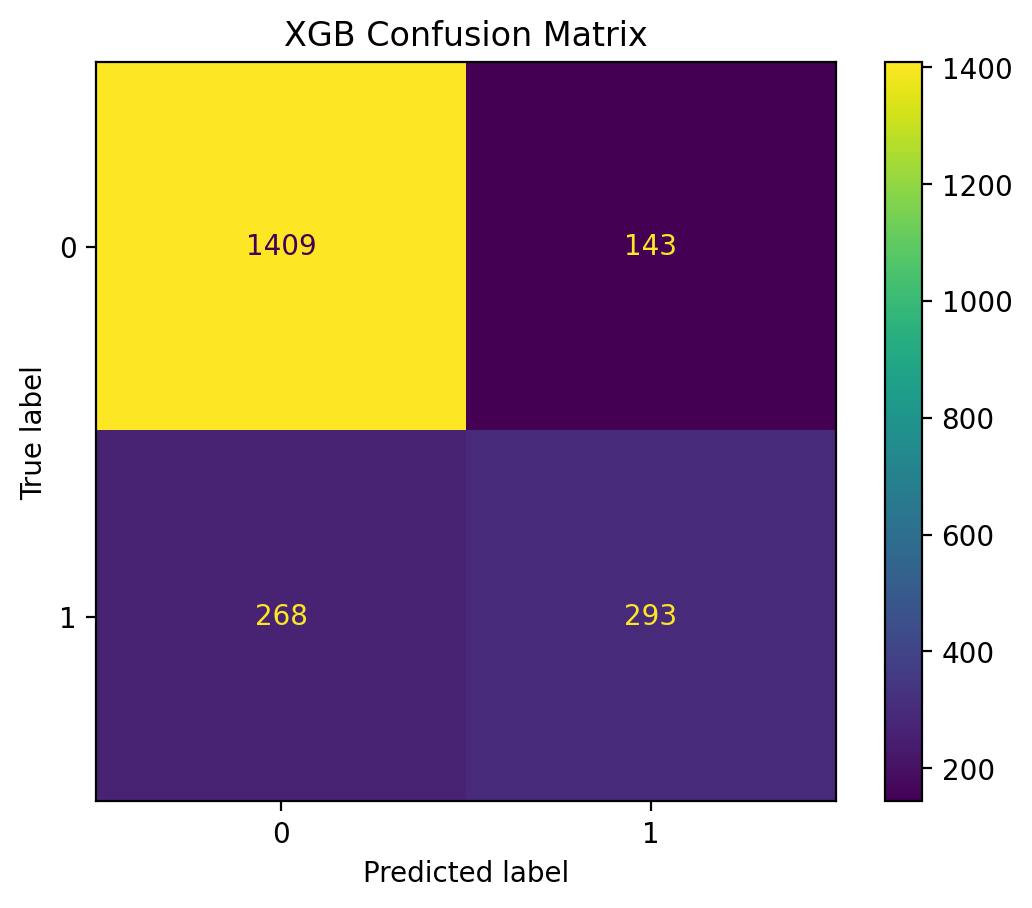

In [75]:
# show the confusion matrix plot for the XGB model
y_pred = xgb_grid_search.predict(X_test)
cm = confusion_matrix(y_test, xgb_grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Disable the grid
plt.title("XGB Confusion Matrix")
plt.show()

In [76]:
# extract the probabilities from each model and save in a data frame
lr_pred = lr_grid_search.predict_proba(X_test)[:, 1]
dt_pred = dt_grid_search.predict_proba(X_test)[:, 1]
rf_pred = rf_grid_search.predict_proba(X_test)[:, 1]
knn_pred = knn_grid_search.predict_proba(X_test)[:, 1]
svm_pred = svm_grid_search.predict_proba(X_test)[:, 1] #Special set up for SVM needed to get probabilities
xgb_pred = xgb_grid_search.predict_proba(X_test)[:, 1]

In [95]:
# Instantiate the classfiers and make a list
classifiers = [lr_grid_search,
               dt_grid_search,
               rf_grid_search,
               knn_grid_search,
               svm_grid_search,
               xgb_grid_search]

classifier_names = ["Logistic Regression",
                   "Decision Tree",
                   "Random Forest",
                   "K Nearest Neighbors",
                   "Support Vector Machine",
                   "Extreme Gradient Boosting Machine"]

results_table = pd.DataFrame(columns=['classifiers', 'classifierNames', 'fpr','tpr','auc'])
results_table

,classifiers,classifierNames,fpr,tpr,auc


In [96]:
for cls in classifiers:
    # print(cls.__class__.__name__)
    model = cls
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    new_row = pd.DataFrame({'classifiers':cls.__class__.__name__,
                                        'fpr':[fpr],
                                        'tpr':[tpr],
                                        'auc':[auc]})

    results_table = pd.concat([results_table, new_row], ignore_index=True)#


<ipython-input-96-f3d00e6cecfb>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [97]:
results_table['classifierNames'] = classifier_names
results_table.set_index('classifierNames', inplace=True)
results_table

,classifiers,fpr,tpr,auc
classifierNames,,,,
Logistic Regression,GridSearchCV,"[0.0, 0.0, 0.0, 0.0006443298969072165, 0.00064...","[0.0, 0.0017825311942959, 0.008912655971479501...",0.851231
Decision Tree,GridSearchCV,"[0.0, 0.0, 0.005154639175257732, 0.01030927835...","[0.0, 0.012477718360071301, 0.1087344028520499...",0.831266
Random Forest,GridSearchCV,"[0.0, 0.0, 0.0, 0.0006443298969072165, 0.00064...","[0.0, 0.0017825311942959, 0.012477718360071301...",0.852544
K Nearest Neighbors,GridSearchCV,"[0.0, 0.01095360824742268, 0.03865979381443299...","[0.0, 0.05169340463458111, 0.20499108734402852...",0.789098
Support Vector Machine,GridSearchCV,"[0.0, 0.0, 0.0, 0.0006443298969072165, 0.00064...","[0.0, 0.0017825311942959, 0.0106951871657754, ...",0.837886
Extreme Gradient Boosting Machine,GridSearchCV,"[0.0, 0.0, 0.0, 0.0006443298969072165, 0.00064...","[0.0, 0.0017825311942959, 0.008912655971479501...",0.853220


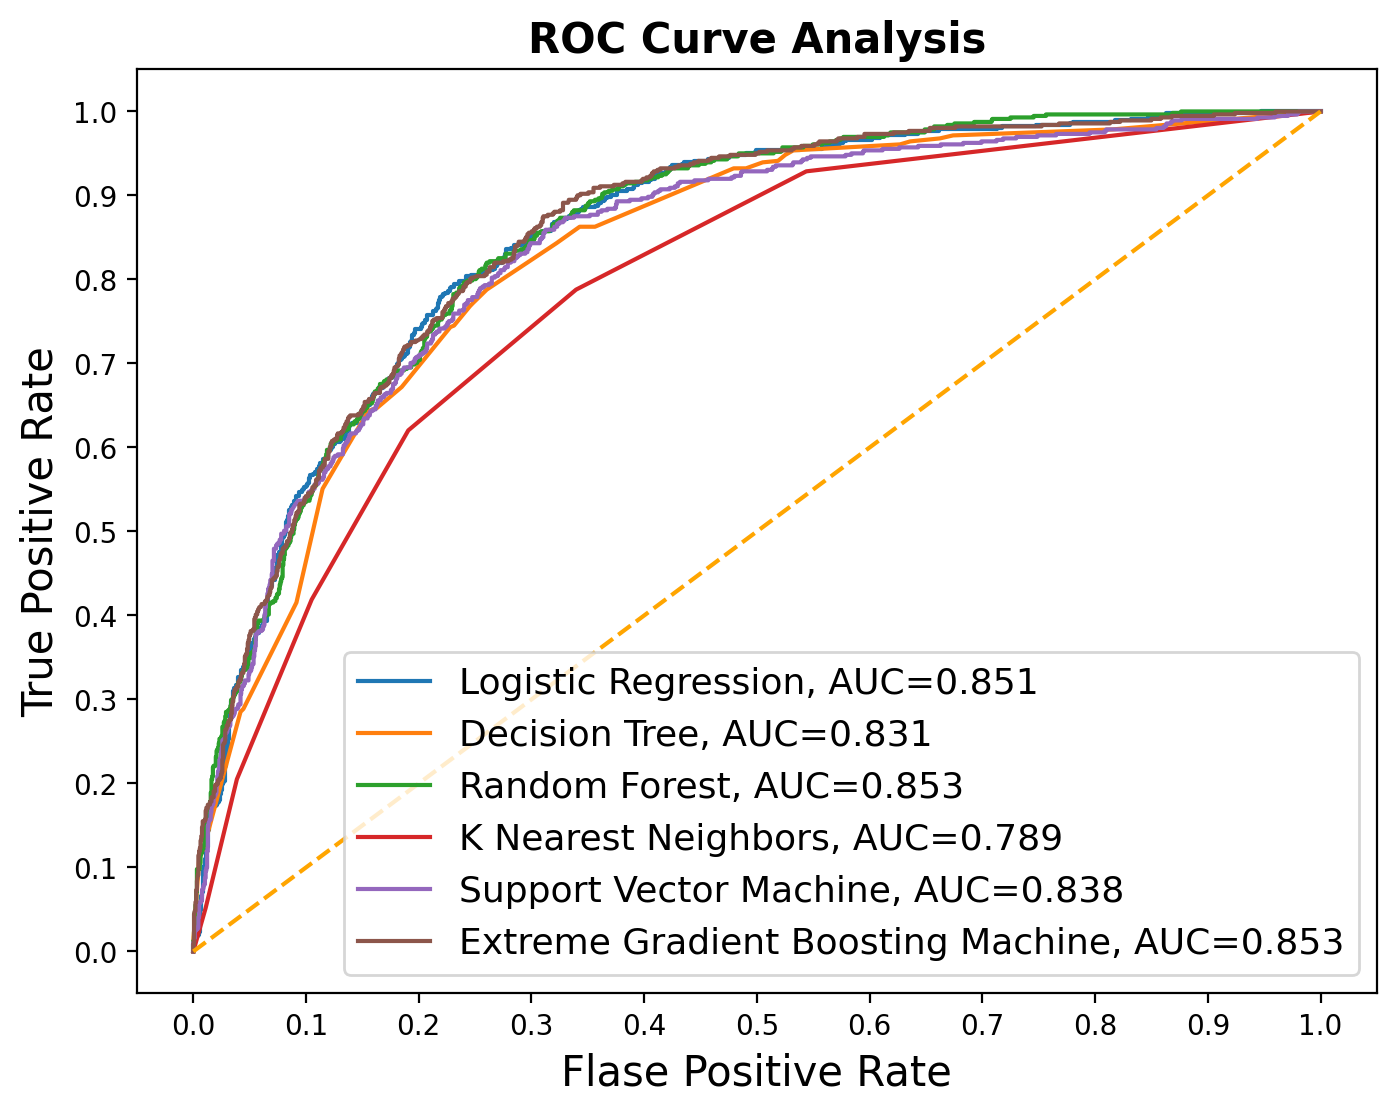

In [98]:
# plot the ROC curves for each of the model types
fig = plt.figure(figsize=(8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'],
             results_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()